# Automobile Insurance Fraud

In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [366]:
data=pd.read_csv('automobile_insurance_fraud.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [367]:
data.shape

(1000, 40)

In [368]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [369]:
data.policy_bind_date=pd.to_datetime(data.policy_bind_date,format='%d-%m-%Y')

In [370]:
data.policy_bind_date.head()

0   2014-10-17
1   2006-06-27
2   2000-09-06
3   1990-05-25
4   2014-06-06
Name: policy_bind_date, dtype: datetime64[ns]

In [371]:
data=data.drop('_c39',axis=1)

In [372]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [373]:
data=data.replace('?',np.nan)

In [374]:
data.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [375]:
weekday=data.policy_bind_date.dt.weekday
weekday

0      4
1      1
2      2
3      4
4      4
5      3
6      6
7      5
8      2
9      0
10     6
11     5
12     3
13     4
14     0
15     0
16     2
17     0
18     6
19     6
20     1
21     6
22     4
23     4
24     4
25     3
26     3
27     3
28     3
29     1
      ..
970    3
971    6
972    0
973    0
974    2
975    5
976    1
977    3
978    2
979    1
980    4
981    2
982    4
983    5
984    3
985    4
986    1
987    2
988    5
989    2
990    5
991    2
992    2
993    5
994    5
995    1
996    6
997    0
998    4
999    0
Name: policy_bind_date, Length: 1000, dtype: int64

In [376]:
y=data.policy_bind_date.dt.month 
y.head()

0    10
1     6
2     9
3     5
4     6
Name: policy_bind_date, dtype: int64

In [377]:
data.fraud_reported=data.fraud_reported.map({'Y':1,'N':0})

In [378]:
data.collision_type.mode()

0    Rear Collision
dtype: object

In [379]:
data.collision_type.fillna('Rear Collision',inplace=True)

In [380]:
data.collision_type.isnull().sum()

0

In [381]:
data.property_damage.unique()

array(['YES', nan, 'NO'], dtype=object)

In [382]:
data.property_damage.mode()

0    NO
dtype: object

In [383]:
data.property_damage.fillna('NO',inplace=True)

In [384]:
data.property_damage.isnull().sum()

0

In [385]:
data.police_report_available.mode()

0    NO
dtype: object

In [386]:
data.police_report_available.fillna('NO',inplace=True)

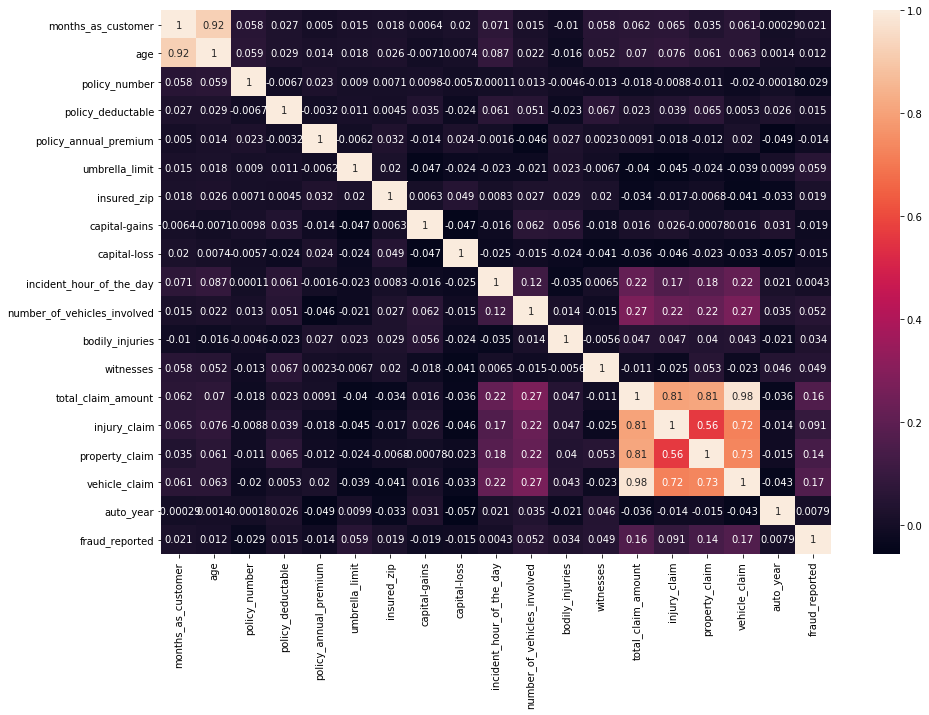

In [387]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

In [388]:
data=data.drop('vehicle_claim',axis=1)# vehicle claim and total claim amount have strong correlation

In [389]:
data=data.drop(['injury_claim','property_claim'],axis=1)

In [390]:
data.policy_number.unique()

array([521585, 342868, 687698, 227811, 367455, 104594, 413978, 429027,
       485665, 636550, 543610, 214618, 842643, 626808, 644081, 892874,
       558938, 275265, 921202, 143972, 183430, 431876, 285496, 115399,
       736882, 699044, 863236, 608513, 914088, 596785, 908616, 666333,
       336614, 584859, 990493, 129872, 200152, 933293, 485664, 982871,
       206213, 616337, 448961, 790442, 108844, 430029, 529112, 939631,
       866931, 582011, 691189, 537546, 394975, 729634, 282195, 420810,
       524836, 307195, 623648, 485372, 598554, 303987, 343161, 519312,
       132902, 332867, 356590, 346002, 500533, 348209, 486676, 260845,
       657045, 761189, 175177, 116700, 166264, 527945, 627540, 279422,
       484200, 645258, 694662, 960680, 498140, 498875, 798177, 614763,
       679370, 958857, 686816, 127754, 918629, 731450, 307447, 992145,
       900628, 235220, 740019, 246882, 797613, 193442, 389238, 760179,
       939905, 872814, 632627, 283414, 163161, 853360, 776860, 149367,
      

In [391]:
data=data.drop('policy_number',axis=1)

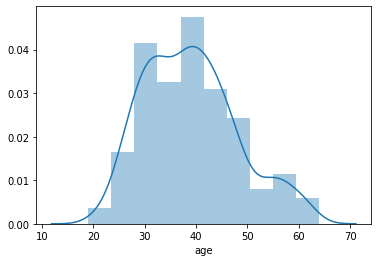

In [392]:
sns.distplot(data.age,bins=10)

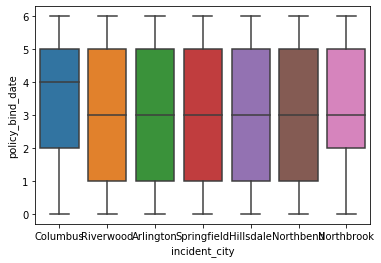

In [393]:
sns.boxplot(data.incident_city,weekday)

In [394]:
data['weekday']=weekday

In [395]:
data.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported,weekday
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,1,2,YES,71610,Saab,92x,2004,1,4
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NO,0,0,NO,5070,Mercedes,E400,2007,1,1
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,2,3,NO,34650,Dodge,RAM,2007,0,2
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,1,2,NO,63400,Chevrolet,Tahoe,2014,1,4
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,0,1,NO,6500,Accura,RSX,2009,0,4


In [396]:
data.weekday

0      4
1      1
2      2
3      4
4      4
5      3
6      6
7      5
8      2
9      0
10     6
11     5
12     3
13     4
14     0
15     0
16     2
17     0
18     6
19     6
20     1
21     6
22     4
23     4
24     4
25     3
26     3
27     3
28     3
29     1
      ..
970    3
971    6
972    0
973    0
974    2
975    5
976    1
977    3
978    2
979    1
980    4
981    2
982    4
983    5
984    3
985    4
986    1
987    2
988    5
989    2
990    5
991    2
992    2
993    5
994    5
995    1
996    6
997    0
998    4
999    0
Name: weekday, Length: 1000, dtype: int64

In [397]:
data.weekday=data.weekday.map({5:0,6:0,1:1,2:1,3:1,4:1,0:1}).astype('int64')

In [398]:
data.weekday

0      1
1      1
2      1
3      1
4      1
5      1
6      0
7      0
8      1
9      1
10     0
11     0
12     1
13     1
14     1
15     1
16     1
17     1
18     0
19     0
20     1
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
970    1
971    0
972    1
973    1
974    1
975    0
976    1
977    1
978    1
979    1
980    1
981    1
982    1
983    0
984    1
985    1
986    1
987    1
988    0
989    1
990    0
991    1
992    1
993    0
994    0
995    1
996    0
997    1
998    1
999    1
Name: weekday, Length: 1000, dtype: int64

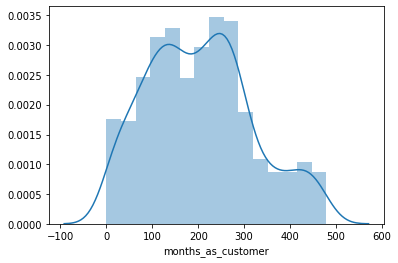

In [399]:
sns.distplot(data.months_as_customer)

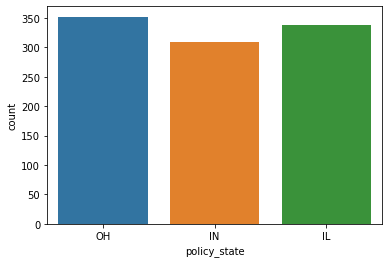

In [400]:
sns.countplot(data.policy_state)

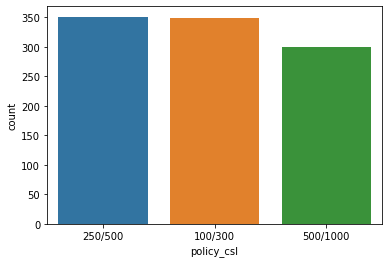

In [401]:
sns.countplot(data.policy_csl)

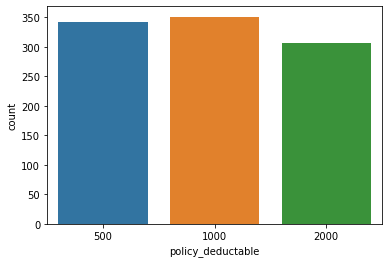

In [402]:
sns.countplot(data.policy_deductable)

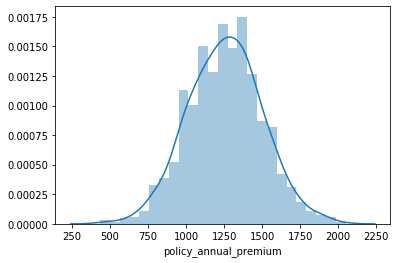

In [403]:
sns.distplot(data.policy_annual_premium)

In [404]:
data.insured_sex.value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [405]:
data.insured_sex=data.insured_sex.map({'MALE':1,'FEMALE':0})

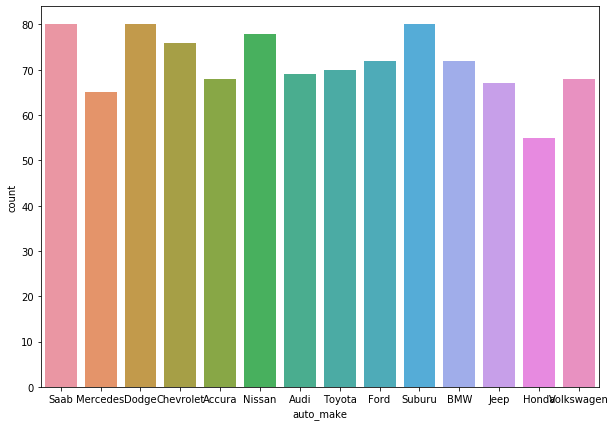

In [406]:
plt.figure(figsize=(10,7))
sns.countplot(data.auto_make)

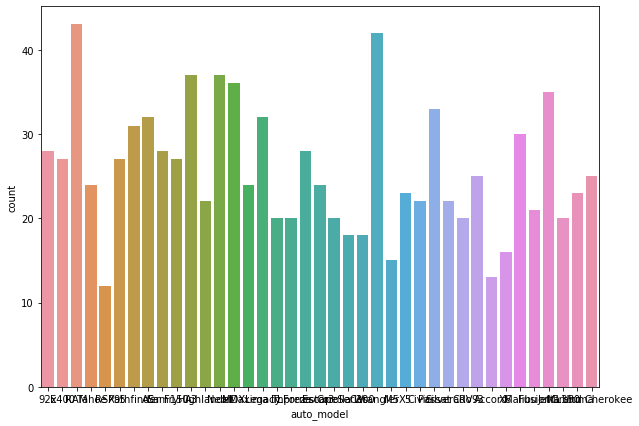

In [407]:
plt.figure(figsize=(10,7))
sns.countplot(data.auto_model)

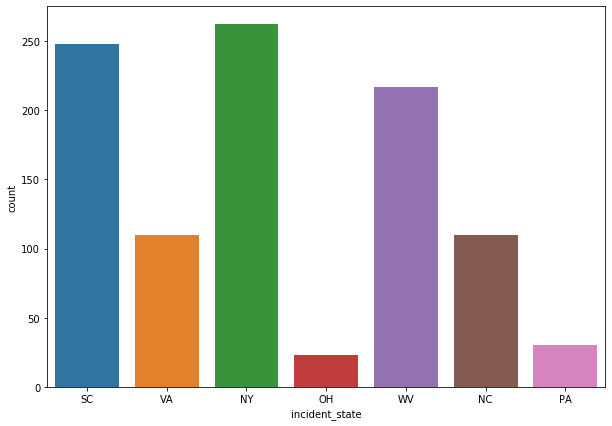

In [408]:
plt.figure(figsize=(10,7))
sns.countplot(data.incident_state)

In [409]:
data.drop('auto_model',axis=1,inplace=True)

In [410]:
data.drop('policy_bind_date',axis=1,inplace=True)

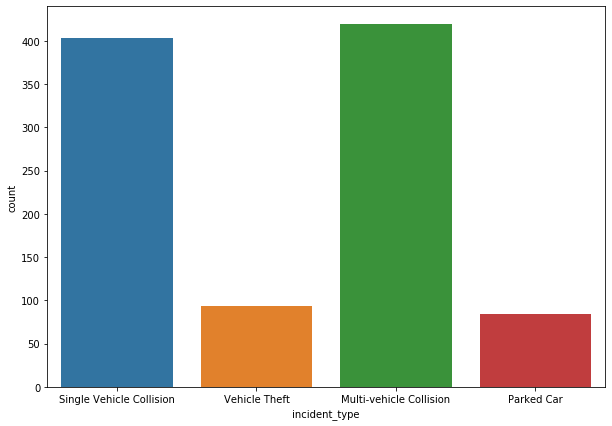

In [411]:
plt.figure(figsize=(10,7))
sns.countplot(data.incident_type)

In [412]:
data.incident_date=pd.to_datetime(data.incident_date,format='%d-%m-%Y')

In [413]:
z=data.incident_date.dt.weekday_name
z

0         Sunday
1      Wednesday
2         Sunday
3       Saturday
4        Tuesday
5         Friday
6        Tuesday
7         Friday
8         Friday
9         Monday
10       Tuesday
11        Sunday
12      Thursday
13      Thursday
14      Thursday
15      Thursday
16        Sunday
17       Tuesday
18        Monday
19        Sunday
20      Thursday
21       Tuesday
22        Sunday
23        Monday
24       Tuesday
25        Friday
26     Wednesday
27     Wednesday
28      Thursday
29        Sunday
         ...    
970     Thursday
971       Friday
972       Sunday
973       Friday
974       Sunday
975     Saturday
976       Monday
977     Saturday
978       Friday
979     Thursday
980       Sunday
981     Thursday
982     Thursday
983     Thursday
984     Saturday
985      Tuesday
986     Thursday
987      Tuesday
988      Tuesday
989       Sunday
990     Saturday
991       Friday
992       Friday
993      Tuesday
994     Thursday
995       Sunday
996     Saturday
997       Frid

In [414]:
data['incident_day']=data.incident_date.dt.weekday_name


In [415]:
data['incident_day']=data['incident_day'].map({'Sunday':'weekend','Saturday':'weekend','Monday':'weekday','Tuesday':'weekday'
                                              ,'Wednesday':'weekday','Thursday':'weekday','Friday':'weekday'})

In [416]:
data.incident_day

0      weekend
1      weekday
2      weekend
3      weekend
4      weekday
5      weekday
6      weekday
7      weekday
8      weekday
9      weekday
10     weekday
11     weekend
12     weekday
13     weekday
14     weekday
15     weekday
16     weekend
17     weekday
18     weekday
19     weekend
20     weekday
21     weekday
22     weekend
23     weekday
24     weekday
25     weekday
26     weekday
27     weekday
28     weekday
29     weekend
        ...   
970    weekday
971    weekday
972    weekend
973    weekday
974    weekend
975    weekend
976    weekday
977    weekend
978    weekday
979    weekday
980    weekend
981    weekday
982    weekday
983    weekday
984    weekend
985    weekday
986    weekday
987    weekday
988    weekday
989    weekend
990    weekend
991    weekday
992    weekday
993    weekday
994    weekday
995    weekend
996    weekend
997    weekday
998    weekday
999    weekday
Name: incident_day, Length: 1000, dtype: object

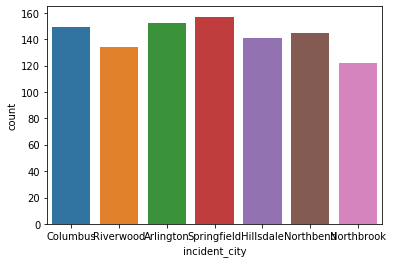

In [417]:
sns.countplot(data.incident_city)

In [418]:
data.incident_location.value_counts()

3654 Cherokee Ave         1
7576 Pine Ridge           1
9878 Washington Ave       1
9935 4th Drive            1
8453 Elm St               1
5783 Oak Ave              1
5640 Embaracadero Lane    1
1643 Washington Hwy       1
3508 Washington St        1
9633 MLK Lane             1
6678 Weaver Drive         1
1699 Oak Drive            1
9279 Oak Hwy              1
7649 Texas St             1
2533 Elm St               1
3041 3rd Ave              1
1654 Pine St              1
1386 Britain St           1
5074 3rd St               1
1381 Francis Ave          1
7121 Rock St              1
1240 Tree Lane            1
7082 Oak Ridge            1
4574 Britain Hwy          1
3492 Flute Lane           1
4095 MLK St               1
3006 Lincoln Ridge        1
4055 2nd Drive            1
5846 Weaver Drive         1
8021 Flute Ave            1
                         ..
3028 5th St               1
7447 Lincoln Ridge        1
4995 Weaver Ridge         1
3797 Solo Lane            1
4633 5th Lane       

In [419]:
data.drop('incident_location',axis=1,inplace=True)

In [420]:
data=data.drop('incident_date',axis=1)

In [421]:
data1=pd.get_dummies(data,drop_first=True)

In [422]:
data1.isnull().sum()

months_as_customer                     0
age                                    0
policy_deductable                      0
policy_annual_premium                  0
umbrella_limit                         0
insured_zip                            0
insured_sex                            0
capital-gains                          0
capital-loss                           0
incident_hour_of_the_day               0
number_of_vehicles_involved            0
bodily_injuries                        0
witnesses                              0
total_claim_amount                     0
auto_year                              0
fraud_reported                         0
weekday                                0
policy_state_IN                        0
policy_state_OH                        0
policy_csl_250/500                     0
policy_csl_500/1000                    0
insured_education_level_College        0
insured_education_level_High School    0
insured_education_level_JD             0
insured_educatio

In [423]:
data1.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,...,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,incident_day_weekend
0,328,48,1000,1406.91,0,466132,1,53300,0,5,...,0,0,0,0,0,1,0,0,0,1
1,228,42,2000,1197.22,5000000,468176,1,0,0,8,...,0,0,0,1,0,0,0,0,0,0
2,134,29,2000,1413.14,5000000,430632,0,35100,0,7,...,0,0,0,0,0,0,0,0,0,1
3,256,41,2000,1415.74,6000000,608117,0,48900,-62400,5,...,0,0,0,0,0,0,0,0,0,1
4,228,44,1000,1583.91,6000000,610706,1,66000,-46000,20,...,0,0,0,0,0,0,0,0,0,0


In [424]:
data_in=data1.drop('fraud_reported',axis=1)
data_op=data1.fraud_reported

In [425]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [426]:
data_inp=sc.fit_transform(data_in)

In [427]:
data_in=pd.DataFrame(data_inp,columns=data_in.columns)

In [428]:
data_in.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,...,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,incident_day_weekend
0,1.078140,0.990836,-0.222383,0.616705,-0.479476,-0.489529,1.076953,1.011331,0.953851,-0.956261,...,-0.278543,-0.241249,-0.267976,-0.263664,-0.290859,3.391165,-0.294884,-0.274352,-0.270114,1.534831
1,0.208995,0.334073,1.412784,-0.242521,1.697980,-0.461008,1.076953,-0.901927,0.953851,-0.524475,...,-0.278543,-0.241249,-0.267976,3.792706,-0.290859,-0.294884,-0.294884,-0.274352,-0.270114,-0.651538
2,-0.608002,-1.088913,1.412784,0.642233,1.697980,-0.984885,-0.928546,0.358023,0.953851,-0.668404,...,-0.278543,-0.241249,-0.267976,-0.263664,-0.290859,-0.294884,-0.294884,-0.274352,-0.270114,1.534831
3,0.452355,0.224613,1.412784,0.652886,2.133471,1.491682,-0.928546,0.853388,-1.267577,-0.956261,...,-0.278543,-0.241249,-0.267976,-0.263664,-0.290859,-0.294884,-0.294884,-0.274352,-0.270114,1.534831
4,0.208995,0.552994,-0.222383,1.341980,2.133471,1.527808,1.076953,1.467210,-0.683741,1.202666,...,-0.278543,-0.241249,-0.267976,-0.263664,-0.290859,-0.294884,-0.294884,-0.274352,-0.270114,-0.651538


In [429]:
data_in.skew()

months_as_customer                     0.362177
age                                    0.478988
policy_deductable                      0.477887
policy_annual_premium                  0.004402
umbrella_limit                         1.806712
insured_zip                            0.816554
insured_sex                            0.148630
capital-gains                          0.478850
capital-loss                          -0.391472
incident_hour_of_the_day              -0.035584
number_of_vehicles_involved            0.502664
bodily_injuries                        0.014777
witnesses                              0.019636
total_claim_amount                    -0.594582
auto_year                             -0.048289
weekday                               -0.868987
policy_state_IN                        0.822868
policy_state_OH                        0.620705
policy_csl_250/500                     0.625306
policy_csl_500/1000                    0.874183
insured_education_level_College        2

In [430]:
for col in data_in.columns:
    if data_in.skew().loc[col]>0.55:
        data_in[col]=np.log1p(data_in[col])
    elif data_in.skew().loc[col]<-0.55:
        data_in[col]=np.power(data_in[col],3)

In [431]:
data_in.isnull().skew()

months_as_customer                     0.0
age                                    0.0
policy_deductable                      0.0
policy_annual_premium                  0.0
umbrella_limit                         0.0
insured_zip                            0.0
insured_sex                            0.0
capital-gains                          0.0
capital-loss                           0.0
incident_hour_of_the_day               0.0
number_of_vehicles_involved            0.0
bodily_injuries                        0.0
witnesses                              0.0
total_claim_amount                     0.0
auto_year                              0.0
weekday                                0.0
policy_state_IN                        0.0
policy_state_OH                        0.0
policy_csl_250/500                     0.0
policy_csl_500/1000                    0.0
insured_education_level_College        0.0
insured_education_level_High School    0.0
insured_education_level_JD             0.0
insured_edu

In [432]:
data_in.skew()

months_as_customer                     0.362177
age                                    0.478988
policy_deductable                      0.477887
policy_annual_premium                  0.004402
umbrella_limit                         1.529444
insured_zip                           -0.467924
insured_sex                            0.148630
capital-gains                          0.478850
capital-loss                          -0.391472
incident_hour_of_the_day              -0.035584
number_of_vehicles_involved            0.502664
bodily_injuries                        0.014777
witnesses                              0.019636
total_claim_amount                    -0.537314
auto_year                             -0.048289
weekday                               -0.868987
policy_state_IN                        0.822868
policy_state_OH                        0.620705
policy_csl_250/500                     0.625306
policy_csl_500/1000                    0.874183
insured_education_level_College        2

In [433]:
for i in range(0,1):
    warnings.filterwarnings('ignore')
    from sklearn.model_selection import train_test_split as tts
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score 
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
    lr=LogisticRegression()
    max_score=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=tts(data_in,data_op,random_state=i,test_size=0.33,stratify=data_op)
        lr.fit(x_train,y_train)
        y_pred=lr.predict(x_test)
        accuracy=accuracy_score(y_test,y_pred)
        if accuracy>max_score:
            max_score=accuracy
            final_state=i
    x_train,x_test,y_train,y_test=tts(data_in,data_op,random_state=final_state,test_size=0.33,stratify=data_op)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    train_pred=lr.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy1=accuracy_score(y_train,train_pred)
    rscore=roc_auc_score(y_test,y_pred)
    c=confusion_matrix(y_test,y_pred)
    kf = KFold(shuffle=True, n_splits=5)
    cv=cross_val_score(lr,data_in,data_op,cv=kf,scoring='accuracy').mean()
    print('**************Logistic Regression*****************')
    print('\n')
    print('max accuracy observed at random state:',final_state)
    print('Testing accuracy:',accuracy,'Training accuracy:',accuracy1)
    print('Cross validation score',cv)
    print('Roc_auc score is:',rscore)
    print('Confusion matrix:\n',c)
    print('\n')
       

**************Logistic Regression*****************


max accuracy observed at random state: 34
Testing accuracy: 0.8666666666666667 Training accuracy: 0.8850746268656716
Cross validation score 0.8320000000000001
Roc_auc score is: 0.7970102281667979
Confusion matrix:
 [[232  16]
 [ 28  54]]




In [434]:
from sklearn.metrics import roc_curve

In [435]:
lr_test_auc=roc_auc_score(y_test,y_pred)
lr_train_auc=roc_auc_score(y_train,train_pred)

In [436]:
lr_test_auc,lr_train_auc

(0.7970102281667979, 0.8299129912991298)

In [437]:
lr_test_probs=lr.predict_proba(x_test)
lr_train_probs=lr.predict_proba(x_train)
lr_test_probs=lr_test_probs[:,1]
lr_train_probs=lr_train_probs[:,1]

In [438]:
lr_test_fpr,lr_test_tpr,test_threshold=roc_curve(y_test,lr_test_probs)
lr_train_fpr,lr_train_tpr,train_threshold=roc_curve(y_train,lr_train_probs)

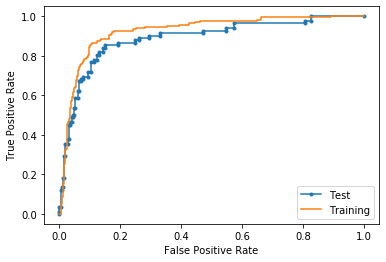

In [439]:
plt.plot(lr_test_fpr,lr_test_tpr,marker='.',label='Test')
plt.plot(lr_train_fpr,lr_train_tpr,label='Training')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
for i in range(0,1):
    from sklearn.neighbors import KNeighborsClassifier as KNC
    KNC=KNC()
    from sklearn.model_selection import GridSearchCV
    parameters=[{'n_neighbors':range(3,20),'weights':['uniform','distance'],'leaf_size':[30,50,70,100]}]
    grid_search=GridSearchCV(estimator=KNC,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
    grid_search=grid_search.fit(x_train,y_train)
    k=grid_search.best_params_
    from sklearn.neighbors import KNeighborsClassifier as KNC
    KNC=KNC(n_neighbors=k['n_neighbors'],weights=k['weights'],leaf_size=k['leaf_size'])
    KNC.fit(x_train,y_train)
    y_pred=KNC.predict(x_test)
    train_pred=KNC.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy1=accuracy_score(y_train,train_pred)
    rscore=roc_auc_score(y_test,y_pred)
    c=confusion_matrix(y_test,y_pred)
    kf = KFold(shuffle=True, n_splits=5)
    cv=cross_val_score(KNC,data_in,data_op,cv=kf,scoring='accuracy').mean()
    print('*****************KNearestNeighbor Classifier*****************')
    print('\n')
    print('Best parameters are:',k)
    print('Testing accuracy:',accuracy,'Training accuracy:',accuracy1)
    print('Cross validation score',cv)
    print('Roc_auc score is:',rscore)
    print('Confusion matrix:\n',c)  
    print('\n')


In [ ]:
for i in range(0,1):
    from sklearn.ensemble import RandomForestClassifier as RFC
    RFC=RFC()
    from sklearn.model_selection import GridSearchCV
    parameters=[{'random_state':range(0,50),'criterion':['gini','entropy'],'n_estimators':[30,50],'max_depth':range(2,9)}]
    grid_search=GridSearchCV(estimator=RFC,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
    grid_search=grid_search.fit(x_train,y_train)
    r=grid_search.best_params_
    from sklearn.ensemble import RandomForestClassifier as RFC
    RFC=RFC(random_state=r['random_state'],criterion=r['criterion'],n_estimators=r['n_estimators'],max_depth=r['max_depth'])
    RFC.fit(x_train,y_train)
    y_pred=RFC.predict(x_test)
    train_pred=RFC.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy1=accuracy_score(y_train,train_pred)
    rscore=roc_auc_score(y_test,y_pred)
    c=confusion_matrix(y_test,y_pred)
    kf = KFold(shuffle=True, n_splits=5)
    cv=cross_val_score(RFC,data_in,data_op,cv=kf,scoring='accuracy').mean()
    print('*****************Random Forest Classifier*****************')
    print('\n')
    print('Best parameters are:',r)
    print('Testing accuracy:',accuracy,'Training accuracy:',accuracy1)
    print('Cross validation score',cv)
    print('Roc_auc score is:',rscore)
    print('Confusion matrix:\n',c)  
    print('\n')

In [ ]:
for i in range(0,1):
    from sklearn.tree import DecisionTreeClassifier as DTC
    DTC=DTC()
    from sklearn.model_selection import GridSearchCV
    parameters=[{'random_state':range(0,100),'criterion':['gini','entropy'],'max_depth':range(2,8)}]
    grid_search=GridSearchCV(estimator=DTC,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
    grid_search=grid_search.fit(x_train,y_train)
    r=grid_search.best_params_
    from sklearn.tree import DecisionTreeClassifier as DTC
    DTC=DTC(random_state=r['random_state'],criterion=r['criterion'],max_depth=r['max_depth'])
    DTC.fit(x_train,y_train)
    y_pred=DTC.predict(x_test)
    train_pred=DTC.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy1=accuracy_score(y_train,train_pred)
    rscore=roc_auc_score(y_test,y_pred)
    c=confusion_matrix(y_test,y_pred)
    kf = KFold(shuffle=True, n_splits=5)
    cv=cross_val_score(DTC,data_in,data_op,cv=kf,scoring='accuracy').mean()
    print('*****************Decision Tree Classifier*****************')
    print('\n')
    print('Best parameters are:',r)
    print('Testing accuracy:',accuracy,'Training accuracy:',accuracy1)
    print('Cross validation score',cv)
    print('Roc_auc score is:',rscore)
    print('Confusion matrix:\n',c)  
    print('\n')

In [ ]:
for i in range(0,1):
    from sklearn.naive_bayes import BernoulliNB as BNB
    BNB=BNB()
    BNB.fit(x_train,y_train)
    y_pred=BNB.predict(x_test)
    train_pred=BNB.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy1=accuracy_score(y_train,train_pred)
    rscore=roc_auc_score(y_test,y_pred)
    c=confusion_matrix(y_test,y_pred)
    kf = KFold(shuffle=True, n_splits=5)
    cv=cross_val_score(BNB,data_in,data_op,cv=kf,scoring='accuracy').mean()
    print('*****************BernoulliNB Classifier*****************')
    print('\n')
    print('Testing accuracy:',accuracy,'Training accuracy:',accuracy1)
    print('Cross validation score',cv)
    print('Roc_auc score is:',rscore)
    print('Confusion matrix:\n',c)  
    print('\n')

In [ ]:
for i in range(0,1):
    from sklearn.naive_bayes import BernoulliNB as BNB
    BNB=BNB()
    BNB.fit(x_train,y_train)
    y_pred=BNB.predict(x_test)
    train_pred=BNB.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy1=accuracy_score(y_train,train_pred)
    rscore=roc_auc_score(y_test,y_pred)
    c=confusion_matrix(y_test,y_pred)
    kf = KFold(shuffle=True, n_splits=5)
    cv=cross_val_score(BNB,data_in,data_op,cv=kf,scoring='accuracy').mean()
    print('*****************BernoulliNB Classifier*****************')
    print('\n')
    print('Testing accuracy:',accuracy,'Training accuracy:',accuracy1)
    print('Cross validation score',cv)
    print('Roc_auc score is:',rscore)
    print('Confusion matrix:\n',c)  
    print('\n')

In [ ]:
for i in range(0,1):
    from sklearn.ensemble import GradientBoostingClassifier as GBC
    GBC=GBC()
    from sklearn.model_selection import GridSearchCV
    parameters=[{'random_state':range(0,30),'learning_rate':[0.5],'max_depth':range(2,8),'n_estimators':[30]}]
    grid_search=GridSearchCV(estimator=GBC,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
    grid_search=grid_search.fit(x_train,y_train)
    r=grid_search.best_params_
    from sklearn.ensemble import GradientBoostingClassifier as GBC
    GBC=GBC(random_state=r['random_state'],learning_rate=r['learning_rate'],max_depth=r['max_depth'],n_estimators=r['n_estimators'])
    GBC.fit(x_train,y_train)
    y_pred=GBC.predict(x_test)
    train_pred=GBC.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy1=accuracy_score(y_train,train_pred)
    rscore=roc_auc_score(y_test,y_pred)
    c=confusion_matrix(y_test,y_pred)
    kf = KFold(shuffle=True, n_splits=5)
    cv=cross_val_score(GBC,data_in,data_op,cv=kf,scoring='accuracy').mean()
    print('*****************Gradient Boosting Classifier*****************')
    print('\n')
    print('Best parameters are:',r)
    print('Testing accuracy:',accuracy,'Training accuracy:',accuracy1)
    print('Cross validation score',cv)
    print('Roc_auc score is:',rscore)
    print('Confusion matrix:\n',c)  
    print('\n')
   

In [ ]:
for i in range(0,1):
    from sklearn.svm import SVC
    classifier=SVC(kernel='rbf',random_state=20)
    classifier.fit(x_train,y_train)
    from sklearn.model_selection import GridSearchCV
    parameters=[{'C':[1,10],'kernel':['linear']},{'C':[1,10],'kernel':['rbf']}]
    grid_search=GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
    grid_search=grid_search.fit(x_train,y_train)
    r=grid_search.best_params_
    from sklearn.svm import SVC
    classifier=SVC(kernel=r['kernel'],C=r['C'],gamma=0.5,probability=True)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    train_pred=classifier.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy1=accuracy_score(y_train,train_pred)
    rscore=roc_auc_score(y_test,y_pred)
    c=confusion_matrix(y_test,y_pred)
    kf = KFold(shuffle=True, n_splits=5)
    cv=cross_val_score(classifier,data_in,data_op,cv=kf,scoring='accuracy').mean()
    print('*****************Support Vector Classifier*****************')
    print('\n')
    print('Best parameters are:',r)
    print('Testing accuracy:',accuracy,'Training accuracy:',accuracy1)
    print('Cross validation score',cv)
    print('Roc_auc score is:',rscore)
    print('Confusion matrix:\n',c)  


In [ ]:
SVC_test_auc=roc_auc_score(y_test,y_pred)
SVC_train_auc=roc_auc_score(y_train,train_pred)
SVC_test_auc,SVC_train_auc

In [ ]:
svc_test_probs=classifier.predict_proba(x_test)
svc_train_probs=classifier.predict_proba(x_train)
svc_test_probs=svc_test_probs[:,1]
svc_train_probs=svc_train_probs[:,1]

In [ ]:
from sklearn.metrics import roc_curve
svc_test_fpr,svc_test_tpr,test_threshold=roc_curve(y_test,svc_test_probs)
svc_train_fpr,svc_train_tpr,train_threshold=roc_curve(y_train,svc_train_probs)

In [ ]:
plt.plot(svc_test_fpr,svc_test_tpr,marker='.',label='Test')
plt.plot(svc_train_fpr,svc_train_tpr,label='Training')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
fraud=pd.DataFrame({'Fraud_reported actual':y_test,'Predicted fraud':y_pred})
print(fraud)
fraud.to_csv('projct16_p1_op.csv')

In [ ]:
for i in range(0,1):
    from sklearn.naive_bayes import GaussianNB as GNB
    GNB=GNB()
    GNB.fit(x_train,y_train)
    y_pred=GNB.predict(x_test)
    train_pred=GNB.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy1=accuracy_score(y_train,train_pred)
    rscore=roc_auc_score(y_test,y_pred)
    c=confusion_matrix(y_test,y_pred)
    kf = KFold(shuffle=True, n_splits=5)
    cv=cross_val_score(GNB,data_in,data_op,cv=kf,scoring='accuracy').mean()
    print('*****************GaussianNB Classifier*****************')
    print('\n')
    print('Testing accuracy:',accuracy,'Training accuracy:',accuracy1)
    print('Cross validation score',cv)
    print('Roc_auc score is:',rscore)
    print('Confusion matrix:\n',c)  
    print('\n')

# Auto Insurance claim amount

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [225]:
data=pd.read_csv('auto_insurance_claim_amount.csv')
data.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [226]:
data.shape

(9134, 26)

In [227]:
data.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [228]:
data.replace('?',np.nan,inplace=True)

In [229]:
data.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [230]:
data.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [231]:
data.Customer.value_counts()

WK52692    1
YD48962    1
XH53960    1
FV33188    1
EL89222    1
GL32197    1
LE41874    1
LV27997    1
GI89160    1
QI99143    1
YE12395    1
LV82913    1
OT52034    1
FM25704    1
VG74039    1
SY46862    1
VR18539    1
FK28721    1
YV67971    1
SK67821    1
OR27665    1
KG57925    1
RK59543    1
JH58573    1
CW98743    1
EE99484    1
YF26585    1
RJ68578    1
CQ80529    1
SO54368    1
          ..
YJ14330    1
DA20472    1
QC34927    1
GY55092    1
GE20220    1
PA56702    1
No73821    1
WV57813    1
VF36700    1
QT24496    1
PD52748    1
WO64354    1
SP29219    1
HO50571    1
FQ66351    1
NG94966    1
VC43751    1
SV46904    1
QP76867    1
HA72996    1
CE92675    1
AM53473    1
BU72633    1
EL61402    1
FY90924    1
GA27295    1
HX44948    1
BS90503    1
UG48681    1
VN79010    1
Name: Customer, Length: 9134, dtype: int64

In [232]:
data.drop('Customer',axis=1,inplace=True)

In [233]:
data.Country.value_counts()

US    9134
Name: Country, dtype: int64

In [234]:
data.drop('Country',axis=1,inplace=True)

In [235]:
data['State Code'].value_counts()

MO    3150
IA    2601
NE    1703
OK     882
KS     798
Name: State Code, dtype: int64

In [236]:
data['State'].value_counts()

Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma     882
Kansas       798
Name: State, dtype: int64

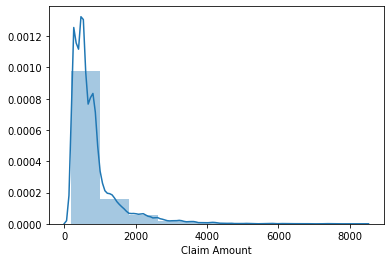

In [237]:
sns.distplot(data['Claim Amount'],bins=10)

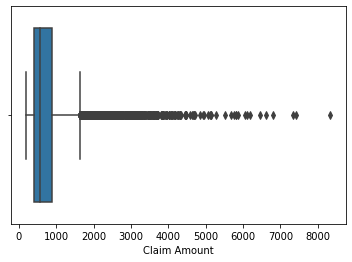

In [238]:
sns.boxplot(data['Claim Amount'])

In [239]:
data=data[data['Claim Amount']<1440]

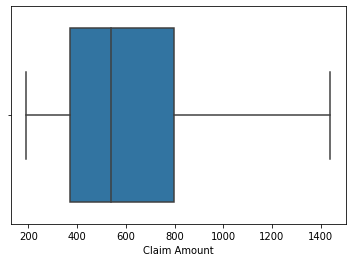

In [240]:
sns.boxplot(data['Claim Amount'])

In [241]:
data.shape

(8089, 24)

In [242]:
data.Response.value_counts()

No     6919
Yes    1170
Name: Response, dtype: int64

In [243]:
data.Coverage.value_counts()

Basic       5035
Extended    2361
Premium      693
Name: Coverage, dtype: int64

In [244]:
data.Education.value_counts()

Bachelor                2435
College                 2407
High School or Below    2301
Master                   637
Doctor                   309
Name: Education, dtype: int64

In [245]:
data['Effective To Date'].value_counts()

1/10/11    180
2/14/11    174
1/27/11    173
1/3/11     161
1/20/11    157
1/26/11    155
1/19/11    155
1/17/11    154
1/31/11    152
2/4/11     151
1/28/11    151
2/3/11     150
2/19/11    147
1/18/11    147
1/21/11    146
2/27/11    146
1/29/11    145
2/26/11    145
1/5/11     145
2/7/11     144
1/2/11     143
2/28/11    143
2/10/11    143
1/11/11    142
2/5/11     141
2/22/11    141
1/23/11    141
2/21/11    137
1/8/11     137
2/25/11    136
1/7/11     134
1/13/11    134
2/12/11    134
1/25/11    133
1/9/11     133
2/1/11     131
1/14/11    131
2/2/11     131
2/23/11    131
1/24/11    131
2/11/11    130
1/30/11    129
1/15/11    129
1/6/11     127
2/18/11    127
2/6/11     127
1/1/11     124
2/13/11    123
2/16/11    122
1/16/11    122
2/24/11    120
2/8/11     117
2/9/11     117
2/20/11    116
1/22/11    115
2/17/11    114
2/15/11    113
1/12/11    109
1/4/11     103
Name: Effective To Date, dtype: int64

In [246]:
data['effective_to_date']=pd.to_datetime(data['Effective To Date'])

In [247]:
data['weekday']=data.effective_to_date.dt.weekday_name

In [248]:
data.drop('Effective To Date',axis=1,inplace=True)

In [249]:
data.Response=data.Response.map({'No':0,'Yes':1}).astype('int64')

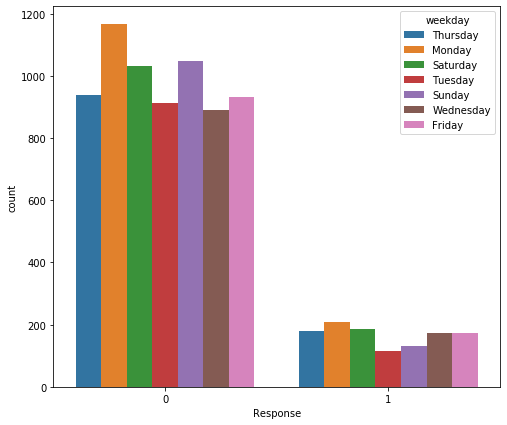

In [250]:
plt.figure(figsize=(8,7))
sns.countplot(x='Response',hue='weekday',data=data)

In [251]:
data.EmploymentStatus.value_counts()

Employed         5028
Unemployed       2061
Medical Leave     384
Disabled          365
Retired           251
Name: EmploymentStatus, dtype: int64

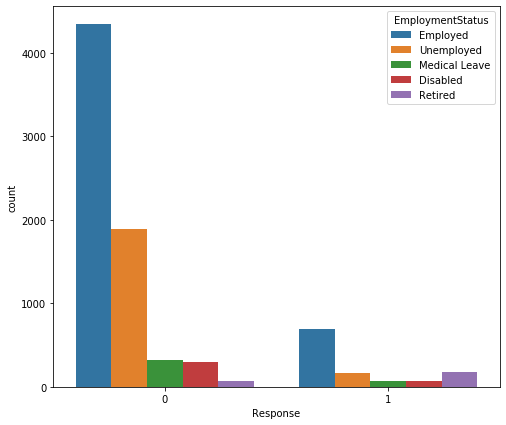

In [252]:
plt.figure(figsize=(8,7))
sns.countplot(x='Response',hue='EmploymentStatus',data=data)

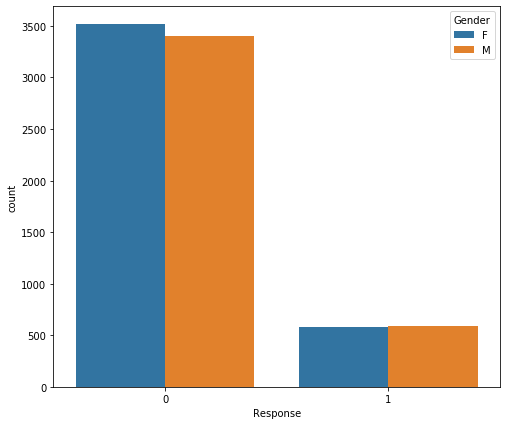

In [253]:
plt.figure(figsize=(8,7))
sns.countplot(x='Response',hue='Gender',data=data)

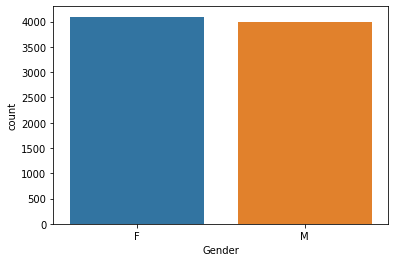

In [254]:
sns.countplot(x='Gender',data=data)

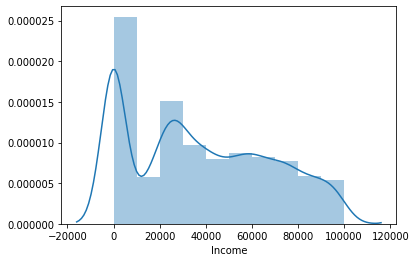

In [255]:
sns.distplot(data.Income,bins=10)

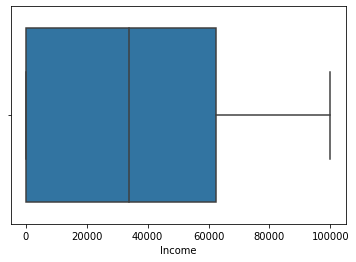

In [256]:
sns.boxplot(data.Income)

In [257]:
data['Location Code'].value_counts()

Suburban    5110
Rural       1572
Urban       1407
Name: Location Code, dtype: int64

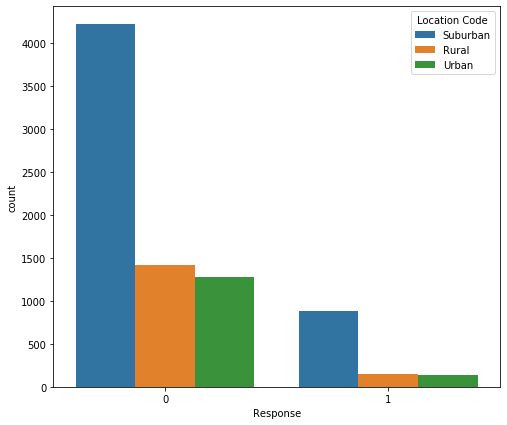

In [258]:
plt.figure(figsize=(8,7))
sns.countplot(x='Response',hue='Location Code',data=data)

In [259]:
data['Marital Status'].value_counts()

Married     4684
Single      2207
Divorced    1198
Name: Marital Status, dtype: int64

In [260]:
data['Marital Status']=data['Marital Status'].map({'Married':'Married','Single':'Single','Divorced':'Single'})

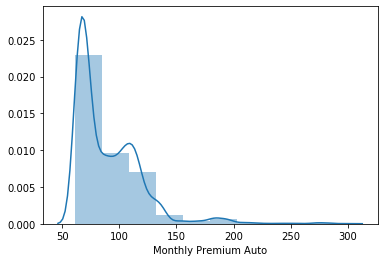

In [261]:
sns.distplot(data['Monthly Premium Auto'],bins=10)

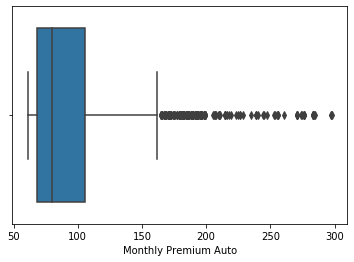

In [262]:
sns.boxplot(data['Monthly Premium Auto'])

In [263]:
data=data[data['Monthly Premium Auto']<150]

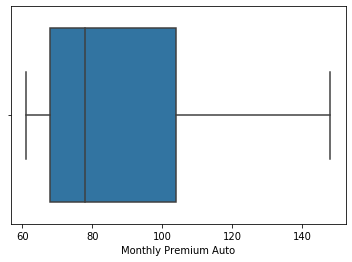

In [264]:
sns.boxplot(data['Monthly Premium Auto'])

In [266]:
data.shape

(7801, 25)

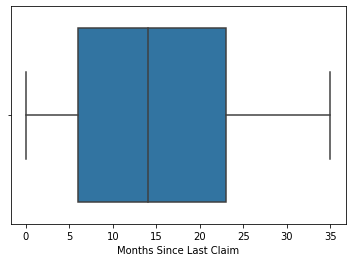

In [267]:
sns.boxplot(data['Months Since Last Claim'])

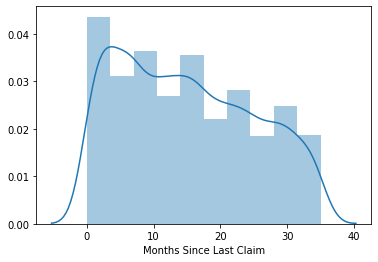

In [268]:
sns.distplot(data['Months Since Last Claim'],bins=10)

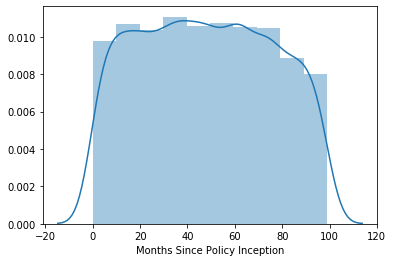

In [269]:
sns.distplot(data['Months Since Policy Inception'],bins=10)

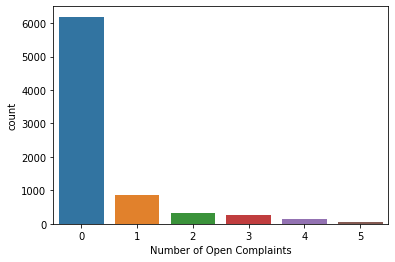

In [270]:
sns.countplot(data['Number of Open Complaints'])

In [271]:
data.drop('Number of Open Complaints',axis=1,inplace=True)

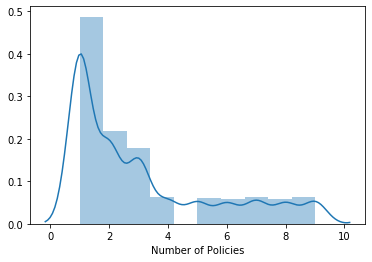

In [272]:
sns.distplot(data['Number of Policies'],bins=10)

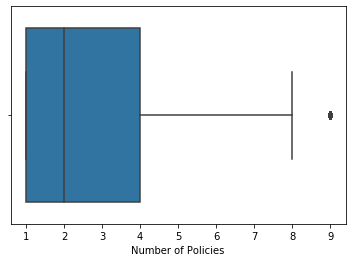

In [273]:
sns.boxplot(data['Number of Policies'])

In [276]:
data=data[data['Number of Policies']<7]

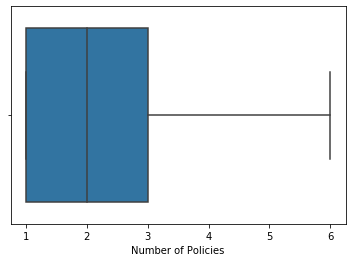

In [277]:
sns.boxplot(data['Number of Policies'])

In [278]:
data.shape

(6645, 24)

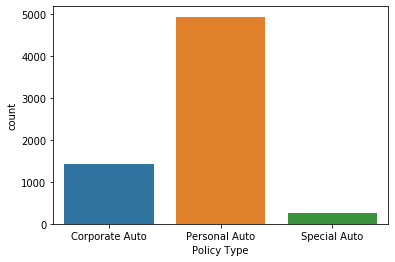

In [279]:
sns.countplot(data['Policy Type'])

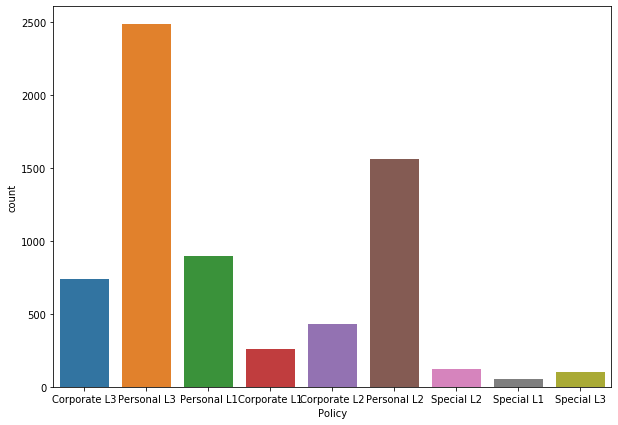

In [280]:
plt.figure(figsize=(10,7))
sns.countplot(data['Policy'])

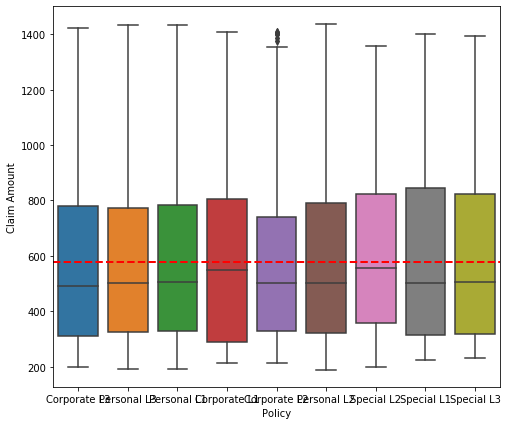

In [281]:
plt.figure(figsize=(8,7))
sns.boxplot(data.Policy,data['Claim Amount'])
plt.axhline(data['Claim Amount'].mean(),color='r',linestyle='dashed',linewidth=2)

In [282]:
data.drop('Policy',axis=1,inplace=True)

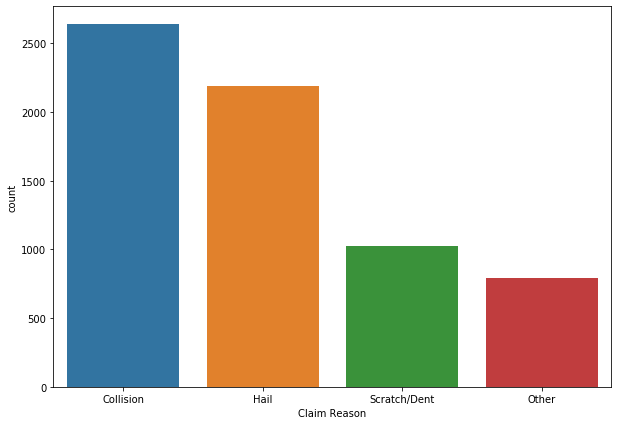

In [283]:
plt.figure(figsize=(10,7))
sns.countplot(data['Claim Reason'])

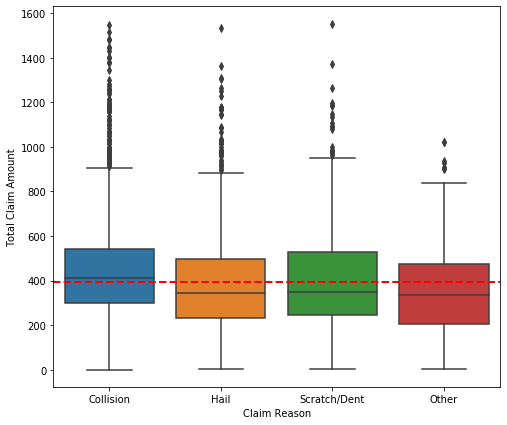

In [284]:
plt.figure(figsize=(8,7))
sns.boxplot(data['Claim Reason'],data['Total Claim Amount'])
plt.axhline(data['Total Claim Amount'].mean(),color='r',linestyle='dashed',linewidth=2)

In [285]:
data['Claim Reason']=data['Claim Reason'].map({'Collision':'collision','Hail':'other','Scratch/Dent':'other','Other':'other'})

In [286]:
data['Claim Reason'].value_counts()

other        4008
collision    2637
Name: Claim Reason, dtype: int64

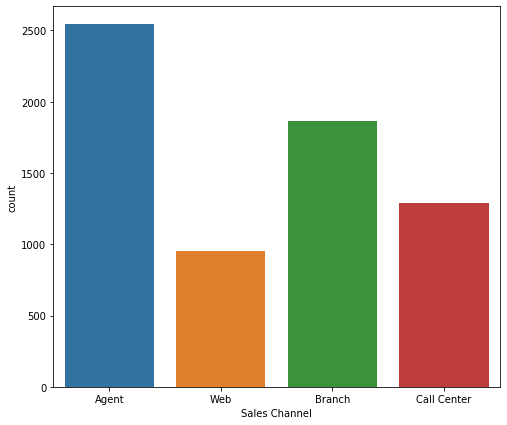

In [287]:
plt.figure(figsize=(8,7))
sns.countplot(data['Sales Channel'])

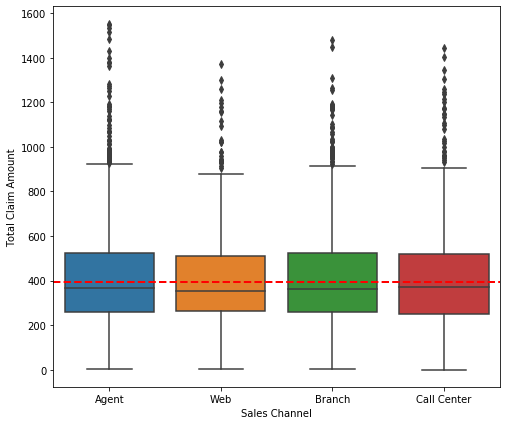

In [288]:
plt.figure(figsize=(8,7))
sns.boxplot(data['Sales Channel'],data['Total Claim Amount'])
plt.axhline(data['Total Claim Amount'].mean(),color='r',linestyle='dashed',linewidth=2)

In [289]:
data.drop('Sales Channel',axis=1,inplace=True)

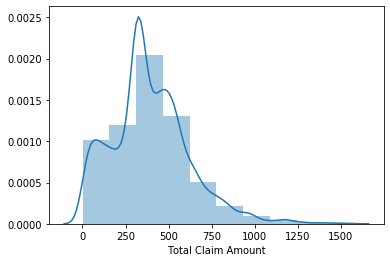

In [290]:
sns.distplot(data['Total Claim Amount'],bins=10)

In [291]:
data['Vehicle Class'].value_counts()

Four-Door Car    3660
Two-Door Car     1462
SUV              1217
Sports Car        306
Name: Vehicle Class, dtype: int64

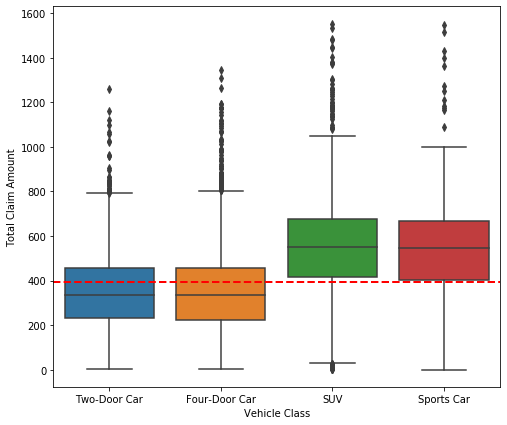

In [292]:
plt.figure(figsize=(8,7))
sns.boxplot(data['Vehicle Class'],data['Total Claim Amount'])
plt.axhline(data['Total Claim Amount'].mean(),color='r',linestyle='dashed',linewidth=2)

In [293]:
data['Vehicle Size'].value_counts()

Medsize    4641
Small      1290
Large       714
Name: Vehicle Size, dtype: int64

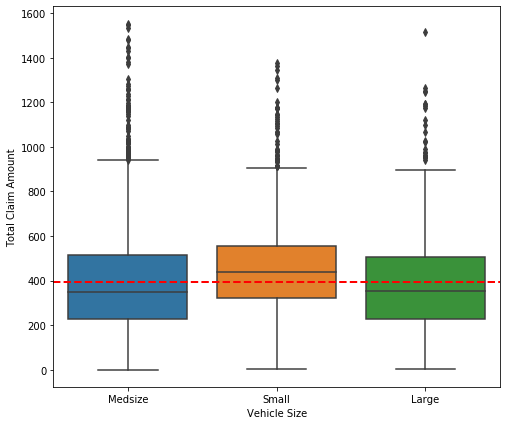

In [294]:
plt.figure(figsize=(8,7))
sns.boxplot(data['Vehicle Size'],data['Total Claim Amount'])
plt.axhline(data['Total Claim Amount'].mean(),color='r',linestyle='dashed',linewidth=2)

In [295]:
data.skew()

Claim Amount                     0.872367
Response                         2.023015
Income                           0.279496
Monthly Premium Auto             0.684055
Months Since Last Claim          0.294788
Months Since Policy Inception    0.038608
Number of Policies               1.156110
Total Claim Amount               0.806646
dtype: float64

In [296]:
data['Claim Amount']=np.log1p(data['Claim Amount'])

In [297]:
data['Monthly Premium Auto']=np.log1p(data['Monthly Premium Auto'])

In [298]:
data.skew()

Claim Amount                     0.108723
Response                         2.023015
Income                           0.279496
Monthly Premium Auto             0.430729
Months Since Last Claim          0.294788
Months Since Policy Inception    0.038608
Number of Policies               1.156110
Total Claim Amount               0.806646
dtype: float64

In [306]:
data_new=pd.get_dummies(data,drop_first=True)

In [307]:
data_new.shape

(6645, 45)

In [308]:
data_new.drop('effective_to_date',axis=1,inplace=True)

In [309]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_scaled=sc.fit_transform(data_new)
data_scaled=pd.DataFrame(data_scaled,columns=data_new.columns)
data_scaled.head()

,Claim Amount,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount,State Code_KS,State Code_MO,...,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,-1.199184,-0.410932,0.596802,-0.796503,1.697087,-1.542702,-0.821102,-0.042717,3.252177,-0.727318,...,-0.21971,1.882855,0.657118,-0.490812,-0.455306,-0.428050,-0.414927,2.513619,-0.376500,-0.387365
1,1.826072,-0.410932,0.351444,1.074642,0.301475,-0.365553,-0.144906,0.752717,-0.307486,-0.727318,...,-0.21971,1.882855,0.657118,-0.490812,-0.455306,2.336178,-0.414927,-0.397833,-0.376500,-0.387365
2,-1.163894,-0.410932,0.190280,-0.561709,-0.296644,-0.151526,-0.821102,-1.122849,3.252177,-0.727318,...,-0.21971,-0.531108,0.657118,-0.490812,-0.455306,-0.428050,-0.414927,2.513619,-0.376500,-0.387365
3,0.950446,2.433490,0.813431,-0.796503,-0.097271,1.632033,-0.144906,-1.029793,-0.307486,-0.727318,...,-0.21971,1.882855,0.657118,-0.490812,-0.455306,-0.428050,-0.414927,-0.397833,2.656039,-0.387365
4,0.685722,-0.410932,-1.242451,0.794193,-1.492883,0.704582,1.207485,-0.138091,-0.307486,-0.727318,...,-0.21971,-0.531108,0.657118,-0.490812,-0.455306,-0.428050,-0.414927,-0.397833,2.656039,-0.387365


In [314]:
data_in=data_scaled.drop('Total Claim Amount',axis=1)
data_op=data_scaled['Total Claim Amount']

In [315]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import KFold

In [321]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
lr=LinearRegression()
max_score=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=tts(data_in,data_op,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    rscore=r2_score(y_test,y_pred)
    print('at random state {} r2score is:{}'.format(i,rscore))
    if rscore>max_score:
            max_score=rscore
            final_state=i
print('Max_score is :',max_score,'at',final_state)

at random state 0 r2score is:0.7509930225993701
at random state 1 r2score is:0.7424022420515639
at random state 2 r2score is:0.7464768136817502
at random state 3 r2score is:0.7285124032238898
at random state 4 r2score is:0.7306621686821322
at random state 5 r2score is:0.7514853526858076
at random state 6 r2score is:0.7376575225198408
at random state 7 r2score is:0.7349526032802836
at random state 8 r2score is:0.7453578350224621
at random state 9 r2score is:0.7347632557468255
at random state 10 r2score is:0.7391553781700236
at random state 11 r2score is:0.7300861516972382
at random state 12 r2score is:0.7415292023586008
at random state 13 r2score is:0.7194647568848003
at random state 14 r2score is:0.7344898053251632
at random state 15 r2score is:0.7425410050256029
at random state 16 r2score is:0.7568943700942911
at random state 17 r2score is:0.7405901449204796
at random state 18 r2score is:0.7355088023487479
at random state 19 r2score is:0.735727552939919
at random state 20 r2score is:0

In [317]:
from sklearn.model_selection import cross_val_score as cvs

In [322]:
x_train,x_test,y_train,y_test=tts(data_in,data_op,random_state=28,test_size=0.20)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
train_pred=lr.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(lr,data_in,data_op,cv=kf,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))

rscore for testing data: 0.7628448661876602
rscore for training data: 0.7338472733597259
Cross val score: [0.75552743 0.74984855 0.71177482 0.74164478 0.75882899 0.73080122
 0.71940198 0.74102366 0.74252899 0.71524518]
Mean cv: 0.7366625583228079


In [323]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error of test data:',mean_absolute_error(y_test,y_pred))
print('Mean absolute error of train data:',mean_absolute_error(y_train,train_pred))
print('Mean squared error of test data:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean squared error of train data:',np.sqrt(mean_squared_error(y_train,train_pred)))

error:
Mean absolute error of test data: 0.353079226096697
Mean absolute error of train data: 0.3713200093596075
Mean squared error of test data: 0.4845408982888891
Mean squared error of train data: 0.5165389631990507


In [324]:
from sklearn.ensemble import RandomForestRegressor as RFR
RFR=RFR(random_state=40)
RFR.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=40, verbose=0,
                      warm_start=False)

In [325]:
from sklearn.model_selection import GridSearchCV
parameters=[{'random_state':range(0,100),'max_depth':range(2,10)}]
grid_search=GridSearchCV(estimator=RFR,param_grid=parameters,scoring='r2',cv=10,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)

In [326]:
grid_search.best_params_

{'max_depth': 8, 'random_state': 57}

In [327]:
score=grid_search.best_score_
score

0.8022490369439488

In [356]:
from sklearn.ensemble import RandomForestRegressor as RFR
RFR=RFR(random_state=57,max_depth=8)
RFR.fit(x_train,y_train)
y_pred=RFR.predict(x_test)
train_pred=RFR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(RFR,data_in,data_op,cv=kf,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))


rscore for testing data: 0.8073617951246472
rscore for training data: 0.864305582764344
Cross val score: [0.80137275 0.80389743 0.80459659 0.83005043 0.79838268 0.81133288
 0.77467289 0.78581695 0.81376395 0.80403696]
Mean cv: 0.8027923506229957


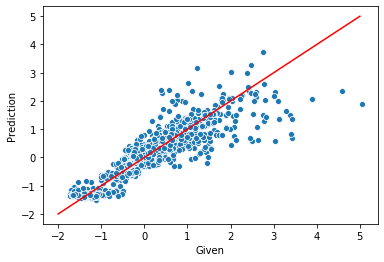

In [360]:
plot_k = sns.scatterplot(y_test, y_pred)
plot_k.set(xlabel='Given', ylabel='Prediction')
x_plot = np.linspace(-2,5,10)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [361]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error of test data:',mean_absolute_error(y_test,y_pred))
print('Mean absolute error of train data:',mean_absolute_error(y_train,train_pred))
print('Mean squared error of test data:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean squared error of train data:',np.sqrt(mean_squared_error(y_train,train_pred)))

error:
Mean absolute error of test data: 0.29009013726337446
Mean absolute error of train data: 0.253487610697343
Mean squared error of test data: 0.43670220639458174
Mean squared error of train data: 0.368823527094116


In [362]:
insurance_claim=pd.DataFrame({'Actual claim':y_test,'Predicted claim':y_pred})
insurance_claim

,Actual claim,Predicted claim
2337,-0.094899,-0.331313
3425,2.433810,2.362960
435,0.912914,1.203049
792,-0.569241,-0.605727
1562,0.633655,0.407073
2335,0.416118,0.569985
727,-0.484135,-0.563697
1132,-0.319498,-0.182250
2414,1.064582,0.707467
3013,2.465336,3.258284


In [364]:
insurance_claim.to_csv('project16_op.csv')

In [337]:
from sklearn.ensemble import AdaBoostRegressor as ABR
ABR=ABR()
ABR.fit(x_train,y_train)
from sklearn.model_selection import GridSearchCV
parameters=[{'random_state':range(0,50),'loss':['linear', 'square', 'exponential'],'learning_rate':[0.3]}]
kf = KFold(shuffle=True, n_splits=10)
grid_search=GridSearchCV(estimator=ABR,param_grid=parameters,scoring='r2',cv=kf,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
score=grid_search.best_score_
score

{'learning_rate': 0.3, 'loss': 'linear', 'random_state': 28}


0.7085506038217163

In [338]:
from sklearn.ensemble import AdaBoostRegressor as ABR
ABR=ABR(learning_rate=0.1,loss='linear',random_state=28)
ABR.fit(x_train,y_train)
y_pred=ABR.predict(x_test)
train_pred=ABR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(ABR,data_in,data_op,cv=kf,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))


rscore for testing data: 0.7496721529775829
rscore for training data: 0.7379616882424973
Cross val score: [0.75741577 0.75465084 0.72040498 0.7295637  0.74020869 0.76167331
 0.69170458 0.77079738 0.71501567 0.69136694]
Mean cv: 0.7332801864907407


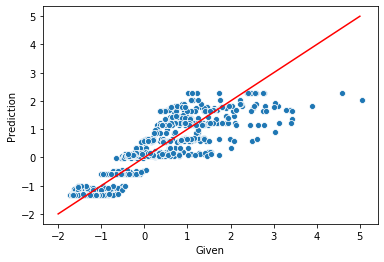

In [340]:
plot_k = sns.scatterplot(y_test, y_pred)
plot_k.set(xlabel='Given', ylabel='Prediction')
x_plot = np.linspace(-2,5,10)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [341]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error of test data:',mean_absolute_error(y_test,y_pred))
print('Mean absolute error of train data:',mean_absolute_error(y_train,train_pred))
print('Mean squared error of test data:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean squared error of train data:',np.sqrt(mean_squared_error(y_train,train_pred)))

error:
Mean absolute error of test data: 0.3835050875334228
Mean absolute error of train data: 0.39025728035280505
Mean squared error of test data: 0.497815892330867
Mean squared error of train data: 0.5125308637294823


In [342]:
from sklearn.neighbors import KNeighborsRegressor
KNR=KNeighborsRegressor(n_neighbors=5,leaf_size=30)
KNR.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [343]:
from sklearn.model_selection import GridSearchCV
parameters=[{'n_neighbors':range(3,20),'weights':['uniform','distance'],'leaf_size':[30,50,80,100]}]
grid_search=GridSearchCV(estimator=KNR,param_grid=parameters,scoring='r2',cv=10,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
score=grid_search.best_score_
score

{'leaf_size': 30, 'n_neighbors': 18, 'weights': 'distance'}


0.5825974683403796

In [344]:
from sklearn.neighbors import KNeighborsRegressor
KNR=KNeighborsRegressor(n_neighbors=18,leaf_size=30,weights='distance')
KNR.fit(x_train,y_train)
y_pred=KNR.predict(x_test)
train_pred=KNR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(KNR,data_in,data_op,cv=kf,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))


rscore for testing data: 0.6203794027074903
rscore for training data: 1.0
Cross val score: [0.59539773 0.58345602 0.56588182 0.5995744  0.55117192 0.61129947
 0.62152566 0.61428285 0.59682166 0.62274901]
Mean cv: 0.5962160551406602


In [345]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
GBR=GBR(alpha=0.1)

In [346]:
GBR.fit(x_train,y_train)
y_pred=GBR.predict(x_test)
train_pred=GBR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(GBR,data_in,data_op,cv=kf,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))

rscore for testing data: 0.8099832934997716
rscore for training data: 0.8198137587943201
Cross val score: [0.78156428 0.78555326 0.79916207 0.77276792 0.80667105 0.79274804
 0.81595346 0.81241307 0.81124729 0.80556612]
Mean cv: 0.7983646564021086


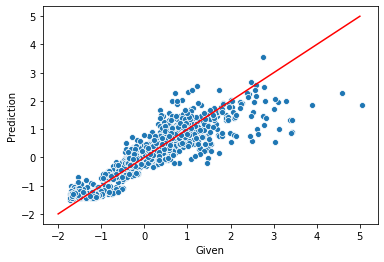

In [347]:
plot_k = sns.scatterplot(y_test, y_pred)
plot_k.set(xlabel='Given', ylabel='Prediction')
x_plot = np.linspace(-2,5,10)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [348]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error of test data:',mean_absolute_error(y_test,y_pred))
print('Mean absolute error of train data:',mean_absolute_error(y_train,train_pred))
print('Mean squared error of test data:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean squared error of train data:',np.sqrt(mean_squared_error(y_train,train_pred)))

error:
Mean absolute error of test data: 0.30032316618822424
Mean absolute error of train data: 0.2997259649642653
Mean squared error of test data: 0.43372061811962787
Mean squared error of train data: 0.42500930602275233


In [349]:
from sklearn.tree import DecisionTreeRegressor as DTC
DTC=DTC()
DTC.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [350]:
from sklearn.model_selection import GridSearchCV
parameters=[{'random_state':range(0,100),'max_depth':range(2,11)}]
grid_search=GridSearchCV(estimator=DTC,param_grid=parameters,scoring='r2',cv=10,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
score=grid_search.best_score_
score

{'max_depth': 6, 'random_state': 9}


0.7769891594255247

In [351]:
from sklearn.tree import DecisionTreeRegressor as DTR
DTR=DTR(max_depth=6,random_state=9)
DTR.fit(x_train,y_train)
y_pred=DTR.predict(x_test)
train_pred=DTR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(DTR,data_in,data_op,cv=kf,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))

rscore for testing data: 0.7968194540814804
rscore for training data: 0.806889568357852
Cross val score: [0.80153186 0.7995757  0.78942679 0.77248201 0.7604017  0.8016321
 0.7794993  0.79607039 0.77910814 0.77421893]
Mean cv: 0.7853946892332421


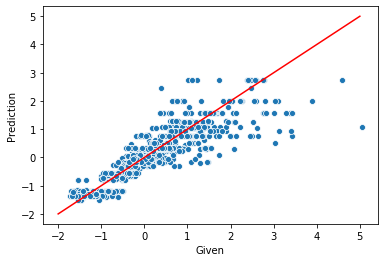

In [352]:
plot_k = sns.scatterplot(y_test, y_pred)
plot_k.set(xlabel='Given', ylabel='Prediction')
x_plot = np.linspace(-2,5,10)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [353]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error of test data:',mean_absolute_error(y_test,y_pred))
print('Mean absolute error of train data:',mean_absolute_error(y_train,train_pred))
print('Mean squared error of test data:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean squared error of train data:',np.sqrt(mean_squared_error(y_train,train_pred)))

error:
Mean absolute error of test data: 0.29884896282390855
Mean absolute error of train data: 0.29833352675558955
Mean squared error of test data: 0.4484925531257308
Mean squared error of train data: 0.4399876575543534


In [354]:
from sklearn.externals import joblib

In [355]:
joblib.dump(RFR,'project16_RFR.pkl')

['project16_RFR.pkl']